In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<h1>Loading the dataset

In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns=['age','workclass','final weight','education','education num','marital status','occupation','relationship',
         'race','sex','capital gain','capital loss','hours per week','country','income']

In [4]:
df.shape

(32560, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   final weight    32560 non-null  int64 
 3   education       32560 non-null  object
 4   education num   32560 non-null  int64 
 5   marital status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital gain    32560 non-null  int64 
 11  capital loss    32560 non-null  int64 
 12  hours per week  32560 non-null  int64 
 13  country         32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are two types of data is present in dataset:
+ int64:Data with numerical data. (Age,Fnlwgt,Educational_num,Capital_gain,Capital_loss,Hours_per_week)
+ object:Object datatype represent categorical data.(Woekclass,Education,Marrital_status,Occupation,Relationship,Race,Sex,Native country,Income)

In [6]:
df.isnull().sum()

age               0
workclass         0
final weight      0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
country           0
income            0
dtype: int64

There are no null values present in the dataset.But there are values '?' are present for unknown details.We will remove those in preprocessing.

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

There are 24 duplicates present in data.We removed those duplicates.

<h1>Exploratory Data Analysis

<H2>Univariate Analysis

<b>Target variable</b>

Our target varible is Income which is categorical.So we will look at its frequency distribution and barplot.But before any analysis we will conver our target variable into numerical classes.

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['income']=le.fit_transform(df['income'])

In [11]:
df['income'].value_counts()

0    24697
1     7839
Name: income, dtype: int64

In [12]:
df['income'].value_counts(normalize=True)

0    0.759067
1    0.240933
Name: income, dtype: float64

<AxesSubplot:xlabel='income', ylabel='count'>

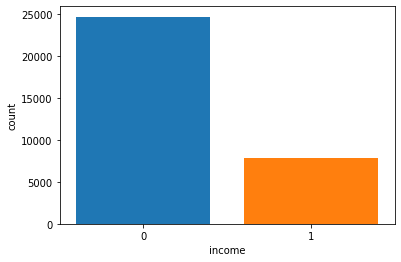

In [13]:
sns.countplot(df['income'],saturation=True)

Around 24719(75%) of population have income less than 50k.There are imbalanced classes present in target variable.

 <b>Independent Features (Categorical)

There is only one binary feature present in dataset i.e. Sex

In [14]:
df['sex'].value_counts()

 Male      21774
 Female    10762
Name: sex, dtype: int64

<AxesSubplot:>

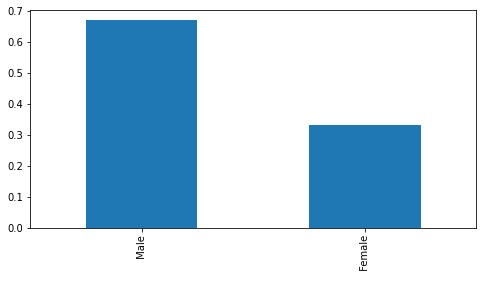

In [15]:
#visualizing sex feature
plt.figure(figsize=(8,4))
df['sex'].value_counts(normalize=True).plot.bar()

From above chart, 65% of population is male.

<b>Independent Features (Ordinal)


There 7 ordinal fetures in data. (Workclass,Education,Marrital_status,Occupation,Relationship,Race,Native_country)

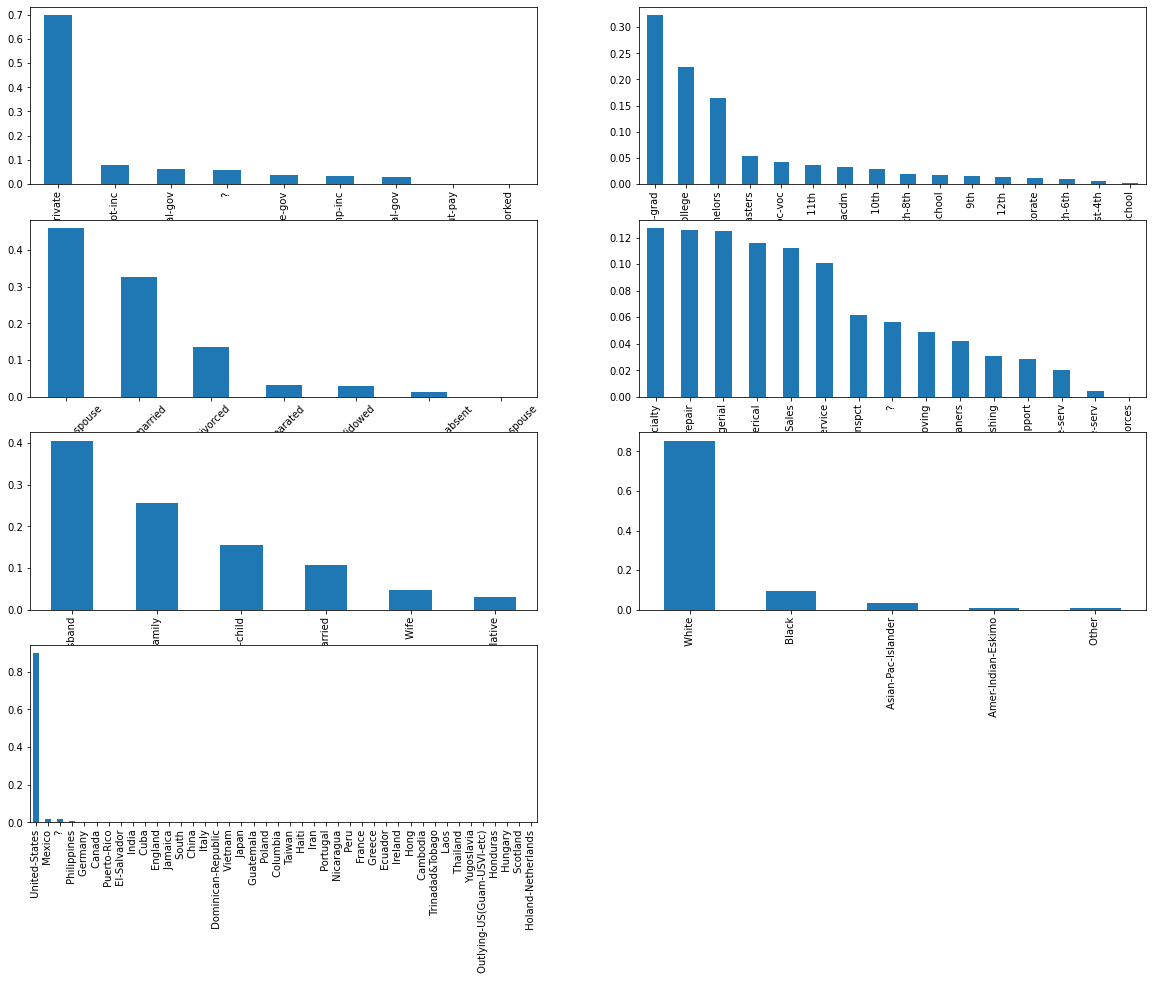

In [16]:
#visualizing ordinal features
plt.subplot(421)
df['workclass'].value_counts(normalize=True).plot.bar(figsize=(20,15))

plt.subplot(422)
df['education'].value_counts(normalize=True).plot.bar()

plt.subplot(423)
df['marital status'].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=45)
plt.subplot(424)
df['occupation'].value_counts(normalize=True).plot.bar()

plt.subplot(425)
df['relationship'].value_counts(normalize=True).plot.bar()

plt.subplot(426)
df['race'].value_counts(normalize=True).plot.bar()

plt.subplot(427)
df['country'].value_counts(normalize=True).plot.bar()

plt.show()


From above charts:
+ 70% of people work in private sector.
+ Most of population has Grad level education.
+ Most of population is married.
+ Most of population have prof-speciality occupation.
+ Most of population id from United Stated.

<b>Independent Fetures (Numerical)</b>

There are 6 numerical features in dataset.

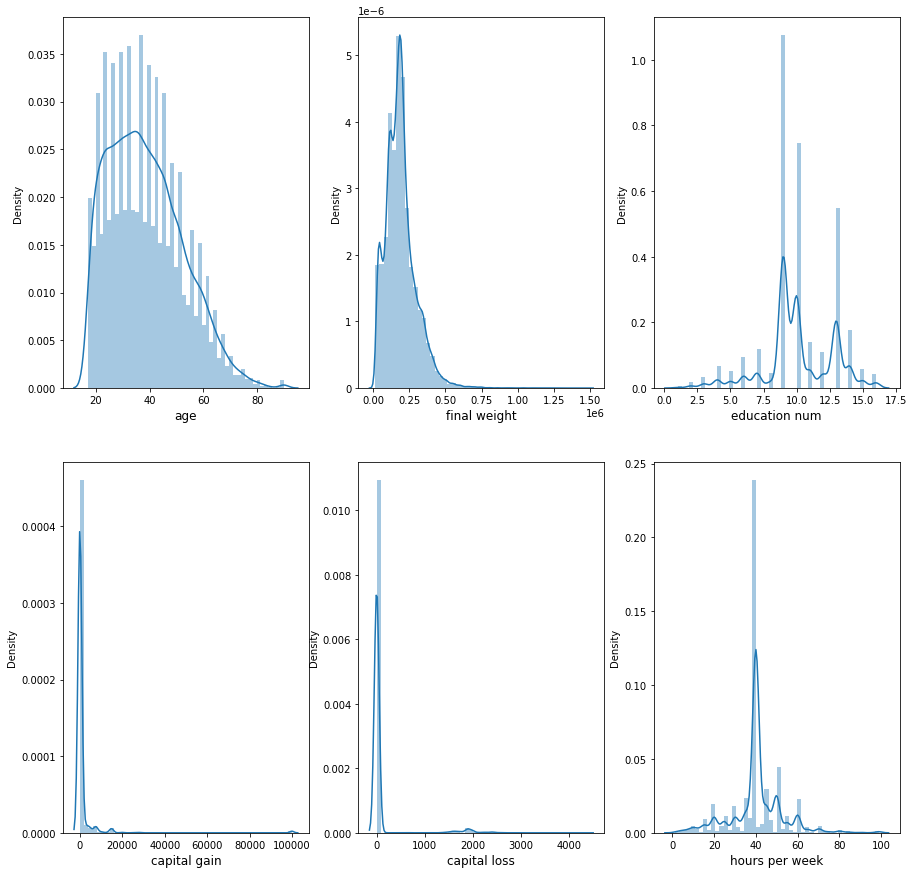

In [17]:
#visualizing distribution of numerical columns
numerical=['age','final weight','education num','capital gain','capital loss','hours per week']
plotnum=1
plt.figure(figsize=(15,15))
for col in numerical:
    ax=plt.subplot(2,3,plotnum)
    sns.distplot(df[col])
    plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()


The columns final weight,capital gain and capital loss are skewed towards left.We will remove skewness in later sections.

<h2>Bivariate analysis

<b>Independent variable vs Target variable

income                 0     1
workclass                     
 ?                  1645   191
 Federal-gov         589   371
 Local-gov          1476   617
 Never-worked          7     0
 Private           17712  4961
 Self-emp-inc        494   622
 Self-emp-not-inc   1816   724
 State-gov           944   353
 Without-pay          14     0


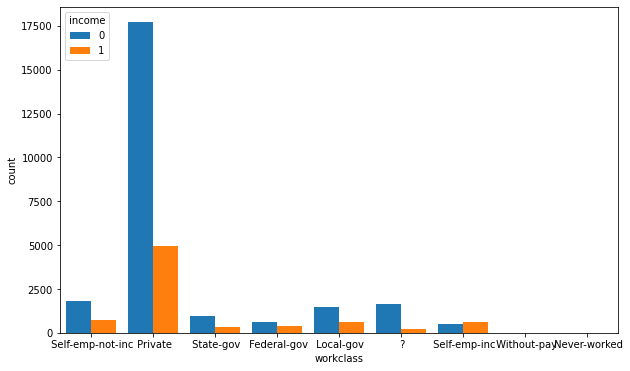

In [18]:
workclass=pd.crosstab(df['workclass'],df['income'])
print(workclass)
plt.figure(figsize=(10,6))
sns.countplot('workclass',hue='income',data=df,saturation=True)
plt.show()

Taking a look at the plot above, I can see that there are Work Class values defined as ? which appears to be error data. As it is very less, I'll simply remove these records. Also, the two values Without-pay and Never-worked are negligible and hence it is safe to drop them too.

In [19]:
df = df.drop(df[df['workclass'] == ' ?'].index)
df = df.drop(df[df['workclass'] == ' Without-pay'].index)
df = df.drop(df[df['workclass'] == ' Never-worked'].index)

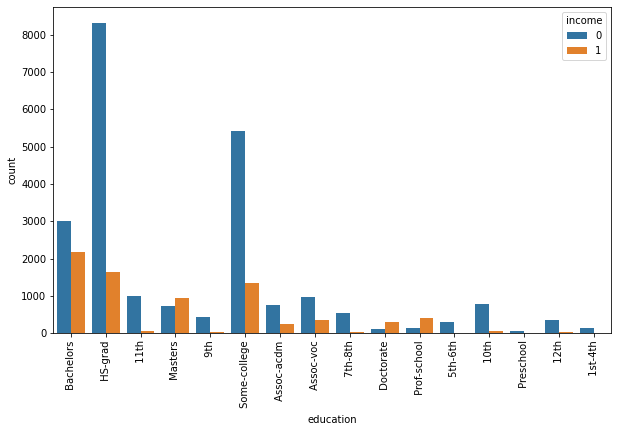

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'education', hue = 'income', data = df)
plt.xticks(rotation=90)
plt.show()

The columns education num and education are just the same. So, I can drop any one column. Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [21]:
df.drop(['education num'], axis = 1, inplace = True)
df['education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['education'].value_counts()


 HS-grad         9952
 Some-college    6763
 Bachelors       5179
 School          3815
 Masters         1674
 Assoc-voc       1321
 Assoc-acdm      1019
 Prof-school      558
 Doctorate        398
Name: education, dtype: int64

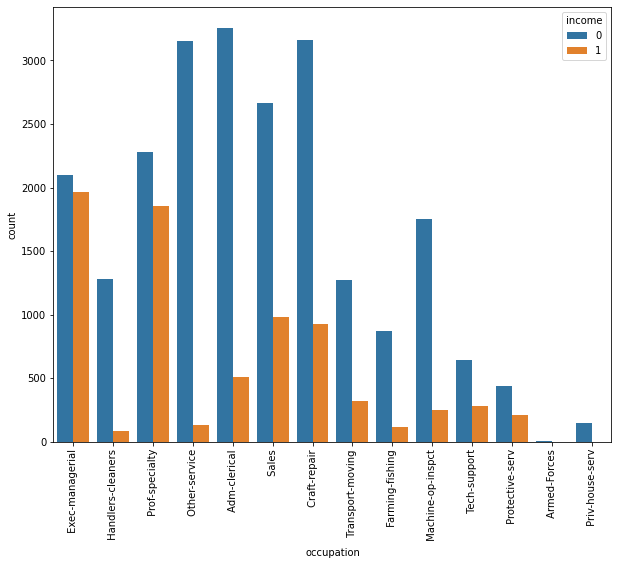

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'occupation', hue = 'income', data = df)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='race', ylabel='count'>

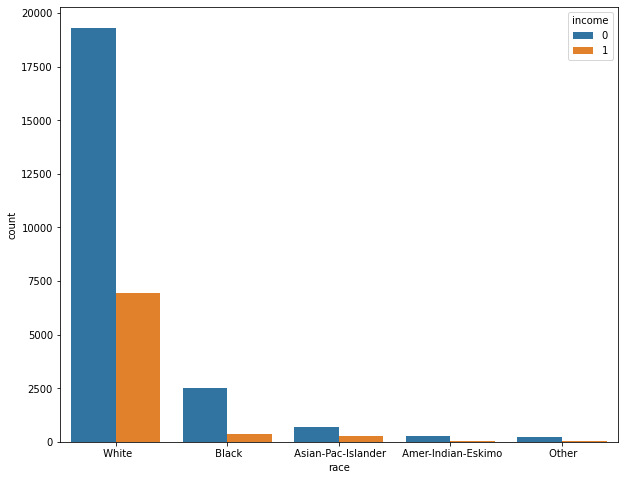

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'race', hue = 'income', data = df)

The dataset includes majority of information about White race while all other races are lesser in number. I'll combine all other race data into one class as Other.

In [24]:
df['race'].unique()
df['race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

In [25]:
df['hours per week'] = pd.cut(df['hours per week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='hours per week', ylabel='count'>

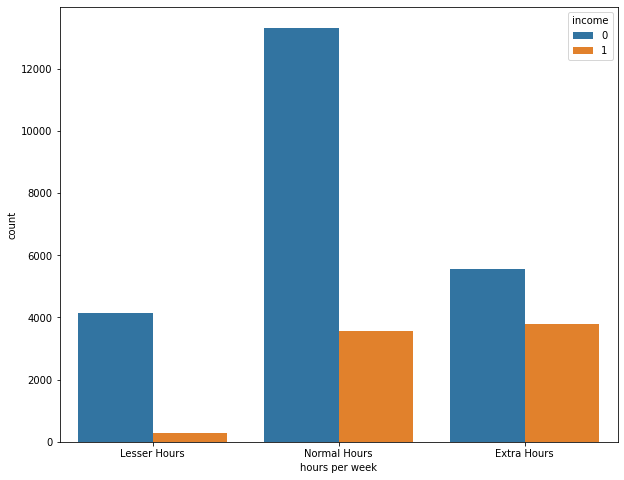

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'hours per week', hue = 'income', data = df)

Taking a look at the plot above, we can see a trend. As the number of hours increase, the number of people earning more than $50K increases in comparison to the people earning less.

The column country has '?' for unknown country,we'll drop those entries.

The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other.

In [27]:
df = df.drop(df[df['country'] == ' ?'].index)

In [28]:
countries = np.array(df['country'].unique())
countries = np.delete(countries, 0)
df['country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='country', ylabel='count'>

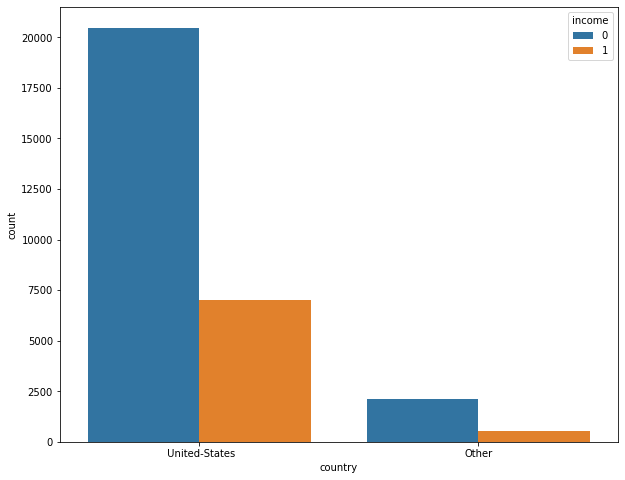

In [29]:
plt.figure(figsize=(10,8))
sns.countplot('country',hue='income',data=df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

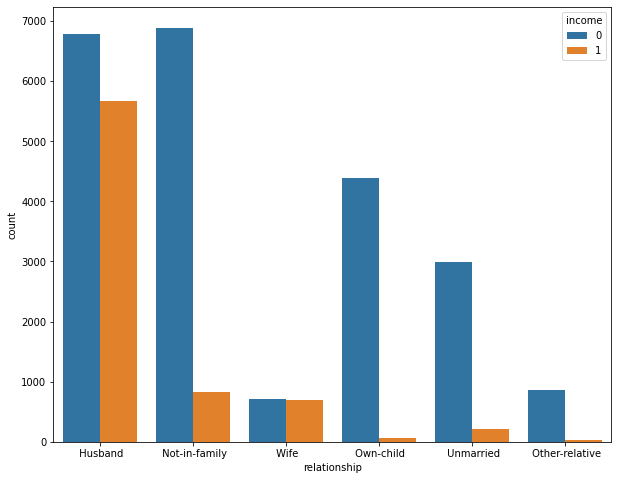

In [30]:
plt.figure(figsize=(10,8))
sns.countplot('relationship',hue='income',data=df)

Rather than having both Capital Gain and Capital Loss, I will use their difference as that is more relevant and gives the change.

In [31]:
df['capital diff'] = df['capital gain'] - df['capital loss']
df.drop(['capital gain'], axis = 1, inplace = True)
df.drop(['capital loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='capital diff', ylabel='count'>

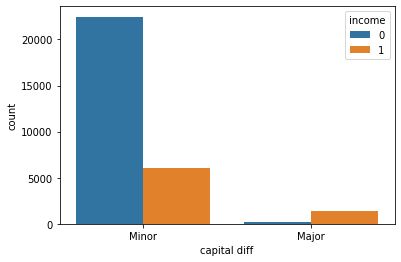

In [32]:
df['capital diff'] = pd.cut(df['capital diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'capital diff', hue = 'income', data = df)

<h2>Multivariate analysis

<B> Correlation plot

,age,final weight,income
age,1.000000,-0.076020,0.242391
final weight,-0.076020,1.000000,-0.009054
income,0.242391,-0.009054,1.000000


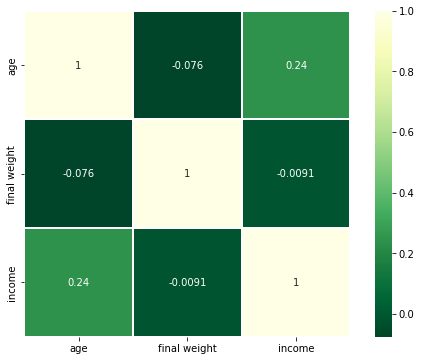

In [33]:
corr=df.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(corr,vmax=1,square=True,cmap='YlGn_r',linewidths=.1,annot=True)
corr

Taking a look at the correlation matrix above, it's clear that there is not a very high linear correlation between any of the continuous features and the target variable. Also, Final Weight has zero correlation with the output class and hence, I'll drop this column.


In [34]:
df.drop('final weight',axis=1,inplace=True)

<h1>Model Building

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [36]:
#dividing dataset into dependent and independent features
y=df['income']
x=df.drop(['income'],axis=1)
x=pd.get_dummies(x)
print(x.shape)

(30124, 54)


<b>Finding best random state

In [37]:
lr=LogisticRegression()
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Random state is ',maxRS,'with accuracy ',maxAccu)

Best Random state is  50 with accuracy  0.8570480194733348


<b>Splitting the data

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21086, 54)
(9038, 54)
(21086,)
(9038,)


In [39]:
y_train.value_counts(normalize=True)

0    0.746799
1    0.253201
Name: income, dtype: float64

Here we have imbalanced classes we will balance classes by undersampling using NearMiss.

In [40]:
from imblearn.under_sampling import NearMiss
nm=NearMiss(0.75)

x_train_ns,y_train_ns=nm.fit_resample(x_train,y_train)

print('The no of classes before fit \n {}'.format(y_train.value_counts()))
print('The no of classes after fit \n{}'.format(y_train_ns.value_counts()))

The no of classes before fit 
 0    15747
1     5339
Name: income, dtype: int64
The no of classes after fit 
0    7118
1    5339
Name: income, dtype: int64


Now our classes are balanced,we'll proceed to model building part.

<h3>Logistic Regression

Training accuracy : 0.7513847635867383
Accuracy score : 0.8468687762779376
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6871
           1       0.69      0.66      0.67      2167

    accuracy                           0.85      9038
   macro avg       0.79      0.78      0.79      9038
weighted avg       0.84      0.85      0.85      9038



<AxesSubplot:>

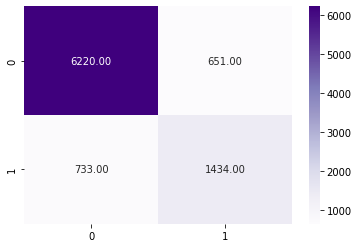

In [41]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_lr=lr.predict(x_test)

#accuracy
print('Training accuracy :',lr.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_lr))

#classification report
print(classification_report(y_test,pred_lr))

#confusion matrix
cm=confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h3>Decision Tree Classsifier

Training accuracy : 0.9283936742393835
Accuracy score : 0.7221730471343217
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      6871
           1       0.44      0.62      0.52      2167

    accuracy                           0.72      9038
   macro avg       0.65      0.69      0.66      9038
weighted avg       0.76      0.72      0.74      9038



<AxesSubplot:>

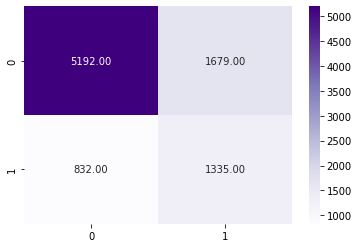

In [42]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_dt=dt.predict(x_test)


#accuracy
print('Training accuracy :',dt.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_dt))

#classification report
print(classification_report(y_test,pred_dt))

#confusion matrix
cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h3>Random Forest Classifier

Training accuracy : 0.9283133980894276
Accuracy score : 0.7738437707457402
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      6871
           1       0.52      0.64      0.58      2167

    accuracy                           0.77      9038
   macro avg       0.70      0.73      0.71      9038
weighted avg       0.79      0.77      0.78      9038



<AxesSubplot:>

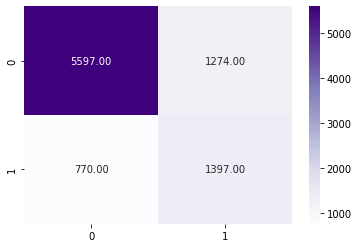

In [43]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_rf=rf.predict(x_test)


#accuracy
print('Training accuracy :',rf.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_rf))

#classification report
print(classification_report(y_test,pred_rf))

#confusion matrix
cm=confusion_matrix(y_test,pred_rf)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h3>Gradiant Boosting Classifier

Training accuracy : 0.7648711567793208
Accuracy score : 0.8414472228369109
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6871
           1       0.68      0.65      0.66      2167

    accuracy                           0.84      9038
   macro avg       0.78      0.78      0.78      9038
weighted avg       0.84      0.84      0.84      9038



<AxesSubplot:>

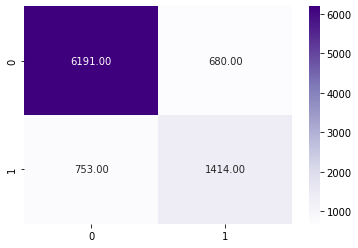

In [44]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_gb=gb.predict(x_test)

#accuracy
print('Training accuracy :',gb.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_gb))

#classification report
print(classification_report(y_test,pred_gb))

#confusion matrix
cm=confusion_matrix(y_test,pred_gb)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h3>Gaussian Naive Bayes

Training accuracy : 0.7168660191057237
Accuracy score : 0.7934277495021023
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6871
           1       0.58      0.50      0.54      2167

    accuracy                           0.79      9038
   macro avg       0.71      0.69      0.70      9038
weighted avg       0.78      0.79      0.79      9038



<AxesSubplot:>

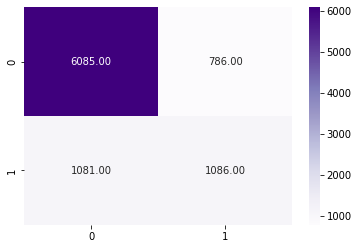

In [45]:
gnb=GaussianNB()
gnb.fit(x_train_ns,y_train_ns)
pred_gnb=gnb.predict(x_test)

#accuracy
print('Training accuracy :',gnb.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_gnb))

#classification report
print(classification_report(y_test,pred_gnb))

#confusion matrix
cm=confusion_matrix(y_test,pred_gnb)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h3>KNeighbors Classifier

Training accuracy : 0.7900778678654572
Accuracy score : 0.7777163089179022
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6871
           1       0.53      0.62      0.57      2167

    accuracy                           0.78      9038
   macro avg       0.70      0.72      0.71      9038
weighted avg       0.79      0.78      0.78      9038



<AxesSubplot:>

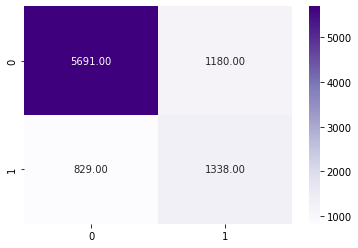

In [46]:
knn=KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)
pred_knn=knn.predict(x_test)

#accuracy
print('Training accuracy :',knn.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_knn))

#classification report
print(classification_report(y_test,pred_knn))

#confusion matrix
cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h3> Support Vector Machine

Training accuracy : 0.7291482700489684
Accuracy score : 0.8404514273069263
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6871
           1       0.72      0.56      0.63      2167

    accuracy                           0.84      9038
   macro avg       0.79      0.74      0.76      9038
weighted avg       0.83      0.84      0.83      9038



<AxesSubplot:>

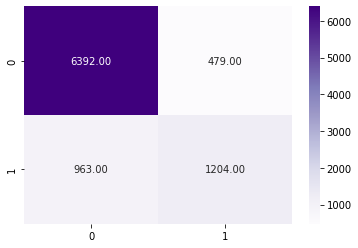

In [47]:
svc=SVC()
svc.fit(x_train_ns,y_train_ns)
pred_svc=svc.predict(x_test)

#accuracy
print('Training accuracy :',svc.score(x_train_ns,y_train_ns))
print('Accuracy score :',accuracy_score(y_test,pred_svc))

#classification report
print(classification_report(y_test,pred_svc))

#confusion matrix
cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(cm,cmap='Purples',annot=True,fmt='.2f')

<h2>Cross Validation
   

In [48]:
#cv score for logistic regression
print('Logistic Regression :',cross_val_score(lr,x,y,cv=5).mean())

#cv score for Decision tree 
print('Desision Tree Classifier :',cross_val_score(dt,x,y,cv=5).mean())

#cv score for Random forest
print('Random Forest Classifier :',cross_val_score(rf,x,y,cv=5).mean())

#cv score for Gradiant boosting
print('Gradiant Boosting Classifier :',cross_val_score(gb,x,y,cv=5).mean())

#cv score for Gaussian NB
print('Gaussian Naive Bayes :',cross_val_score(gnb,x,y,cv=5).mean())

#cv score for KNeighbors 
print('KNeighbors Classifier :',cross_val_score(knn,x,y,cv=5).mean())

#cv score for SVC
print('Support Vector Classifer :',cross_val_score(gnb,x,y,cv=5).mean())


Logistic Regression : 0.8466339400351568
Desision Tree Classifier : 0.7977692494200239
Random Forest Classifier : 0.8213053842720404
Gradiant Boosting Classifier : 0.85084987298386
Gaussian Naive Bayes : 0.7839592170736143
KNeighbors Classifier : 0.8194795258798828
Support Vector Classifer : 0.7839592170736143


From above cross validation and accuracy scores SVC is best model.I will continue with Support Vector Classifier.

In [75]:
parameters= {'C': [0.01,0.1, 1, 10],
              'kernel': ['rbf','linear']}
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [76]:
GCV.fit(x_train_ns,y_train_ns)
GCV.best_params_

{'C': 0.01, 'kernel': 'linear'}

<h3>ROC AUC Curve

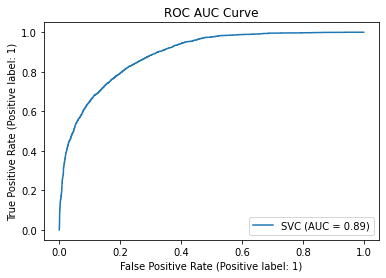

In [81]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

<B>Saving the model
    

In [83]:
import joblib
joblib.dump(GCV.best_estimator_,'Census Income.pkl')

['Census Income.pkl']

In [84]:
joblib.load('Census Income.pkl')

SVC(C=0.01, kernel='linear')